In [41]:
# imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# Load the dataset
data = pd.read_csv('../OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=',\s*', engine='python')

In [29]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [51]:
# To check if any article has more than two channels, we'll sum the one-hot encoded channel columns for each row.
# If the sum is greater than 2, then the article is categorized in more than two channels.

# The one-hot encoded channel columns are as follows:
channel_columns = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
]

# Sum the channel columns for each row
data['channel_count'] = data[channel_columns].sum(axis=1)

# Check if any article has more than two channels
articles_more_than_two_channels = data[data['channel_count'] > 2]

# Count the number of such articles
num_articles_more_than_two_channels = articles_more_than_two_channels.shape[0]

num_articles_more_than_two_channels, articles_more_than_two_channels[['url'] + channel_columns] if num_articles_more_than_two_channels > 0 else "No articles with more than two channels"


(0, 'No articles with more than two channels')

In [33]:
# Function to determine the category
def get_category(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Technology'
    elif row['data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'Other'


# Apply the function to each row to create the Category column
data['Category'] = data.apply(get_category, axis=1)

# Filter out rows that do not belong to any category
filtered_data = data

In [67]:
filtered_data.to_csv('../OnlineNewsPopularity/filtered_data.csv')

In [56]:
min_max = pd.DataFrame()
min_max = filtered_data.groupby('Category')['shares'].agg(['min', 'max', 'mean', 'std', 'var']).reset_index()
min_max

,Category,min,max,mean,std,var
0,Business,1,690400,3063.018536,15046.387626,2.263938e+08
1,Entertainment,47,210300,2970.487034,7858.133920,6.175027e+07
2,Lifestyle,28,208300,3682.123392,8885.017375,7.894353e+07
3,Other,4,843300,5945.189599,19392.998064,3.760884e+08
4,Social Media,5,122800,3629.383125,5524.167095,3.051642e+07
5,Technology,36,663600,3072.283283,9024.343803,8.143878e+07
6,World,35,284700,2287.734069,6089.669476,3.708407e+07


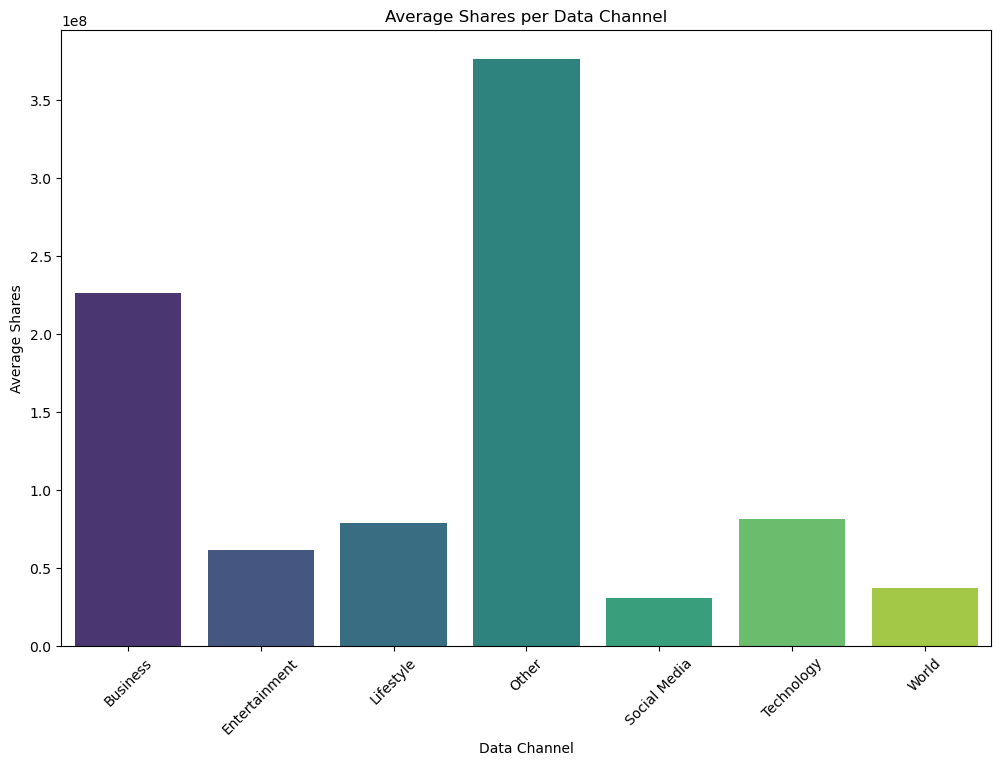

In [66]:
# Plotting a barplot to show the average number of shares for each data channel
plt.figure(figsize=(12, 8))

# Calculate the mean shares for each channel and plot
mean_sharesp_er_channel = min_max['var'].sort_values()
sns.barplot(x=min_max['Category'], y=mean_sharesp_er_channel, palette='viridis')

plt.title('Average Shares per Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [58]:
std_dev = filtered_data.groupby('Category')['shares'].std()
variance = filtered_data.groupby('Category')['shares'].var()
variability_df = pd.DataFrame({'Standard Deviation': std_dev, 'Variance': variance})
variability_df

,Standard Deviation,Variance
Category,,
Business,15046.387626,2.263938e+08
Entertainment,7858.133920,6.175027e+07
Lifestyle,8885.017375,7.894353e+07
Other,19392.998064,3.760884e+08
Social Media,5524.167095,3.051642e+07
Technology,9024.343803,8.143878e+07
World,6089.669476,3.708407e+07


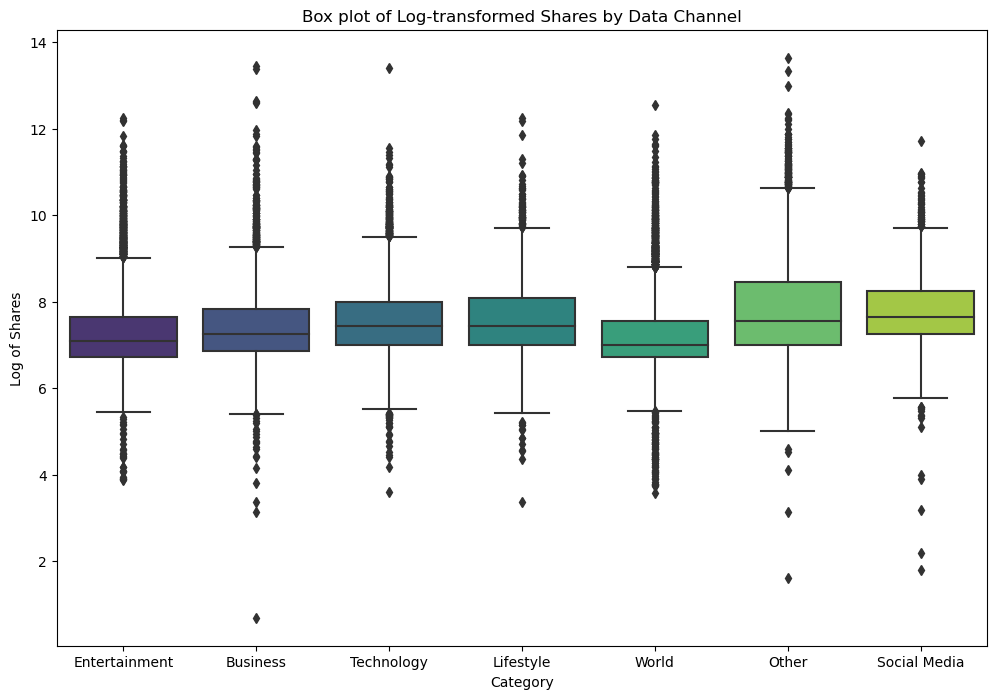

In [54]:


# Apply a log transformation to the 'shares' column to reduce the impact of very large values.
# We add 1 to avoid taking log of zero.
filtered_data['log_shares'] = np.log(filtered_data['shares'] + 1)

# Now, let's plot the box plot with the transformed data
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='log_shares', data=filtered_data, palette='viridis')
plt.title('Box plot of Log-transformed Shares by Data Channel')
plt.ylabel('Log of Shares')
plt.show()


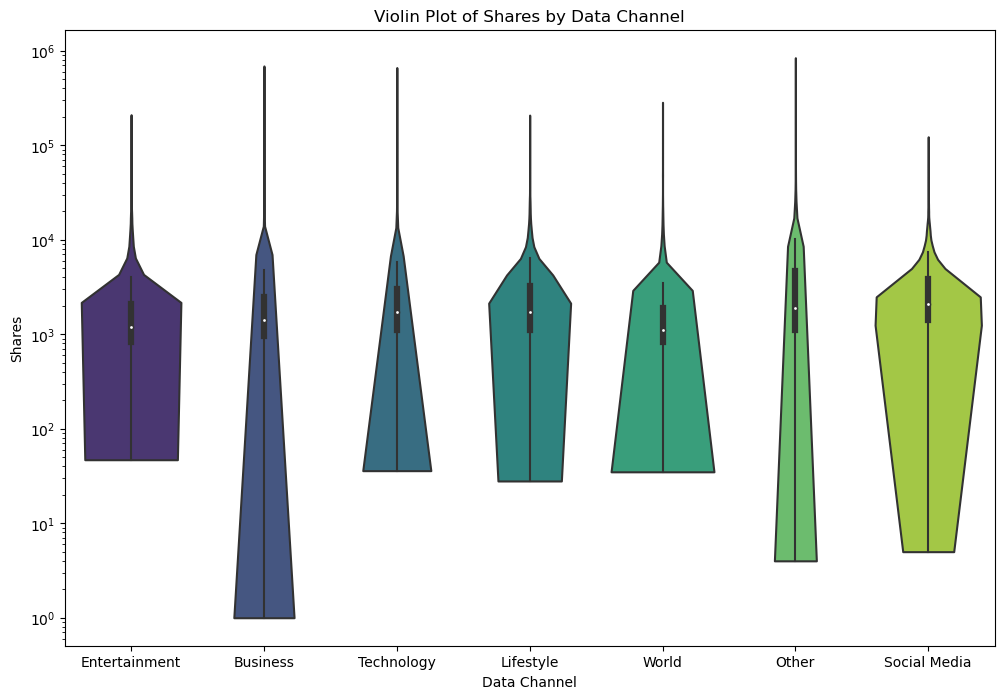

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is still in memory and contains the necessary data.
# Plotting a violin plot for the 'shares' across different 'data_channel'

plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='shares', data=filtered_data, cut=0, palette='viridis')
plt.title('Violin Plot of Shares by Data Channel')
plt.ylabel('Shares')
plt.xlabel('Data Channel')
plt.yscale('log')  # Setting the y-axis to a log scale to handle large values
plt.show()


c:\Users\Swarali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Swarali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


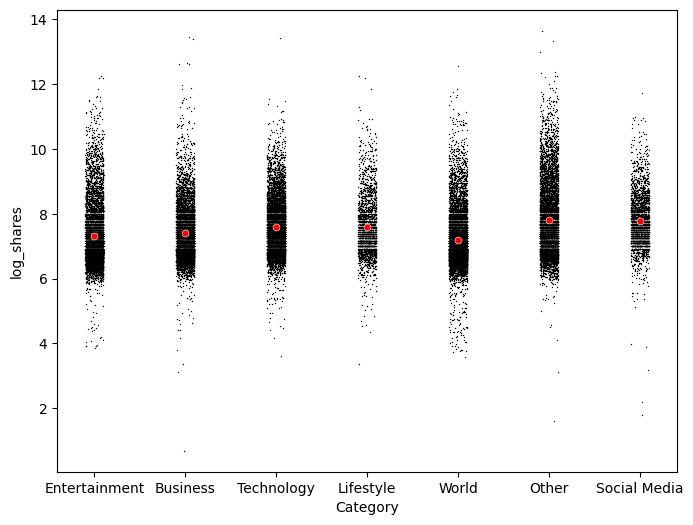

In [75]:
# Create the plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='Category', y='log_shares', data=filtered_data, jitter=True, size=1, color='black')

# To highlight the mean value like in the uploaded image:
mean_widths = filtered_data.groupby('Category')['log_shares'].mean().reset_index()
# sns.pointplot(x='Category', y='shares', data=mean_widths, color='red', scale=0.6, linestyle='')
sns.scatterplot(x='Category', y='log_shares', data=mean_widths, color='red', s=25, zorder=5)


plt.show()

In [11]:
print(mean_widths)

        Category       shares
0       Business  3063.018536
1  Entertainment  2970.487034
2      Lifestyle  3682.123392
3          Other  5945.189599
4   Social Media  3629.383125
5     Technology  3072.283283
6          World  2287.734069


<Axes: xlabel='Category', ylabel='shares'>

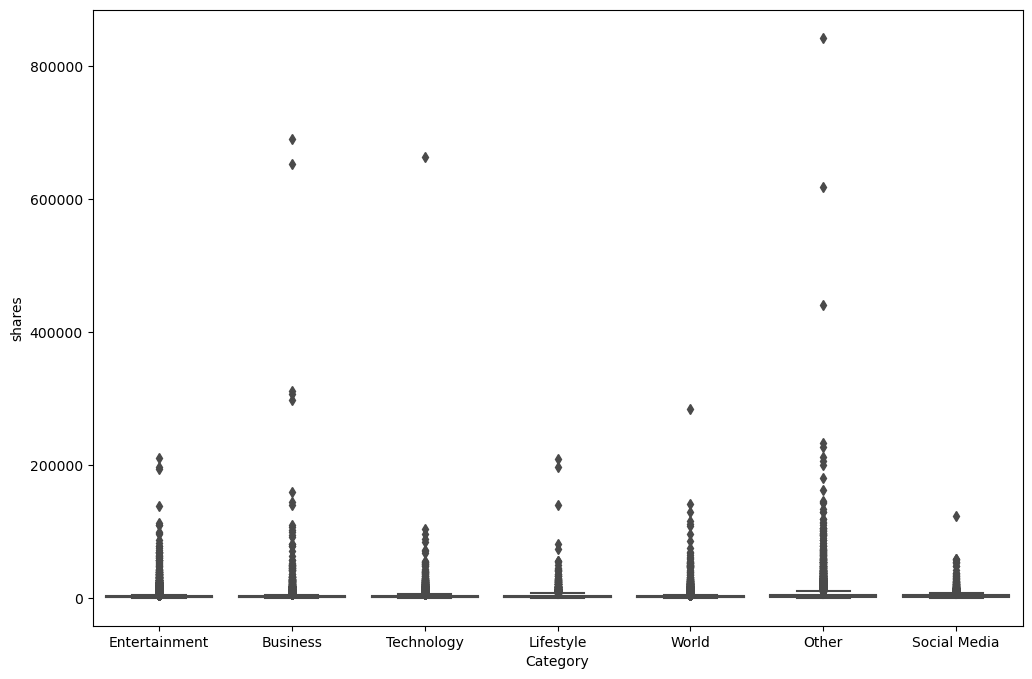

In [8]:
# Boxplot for the distribution of shares by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='shares', data=filtered_data, palette='Spectral')

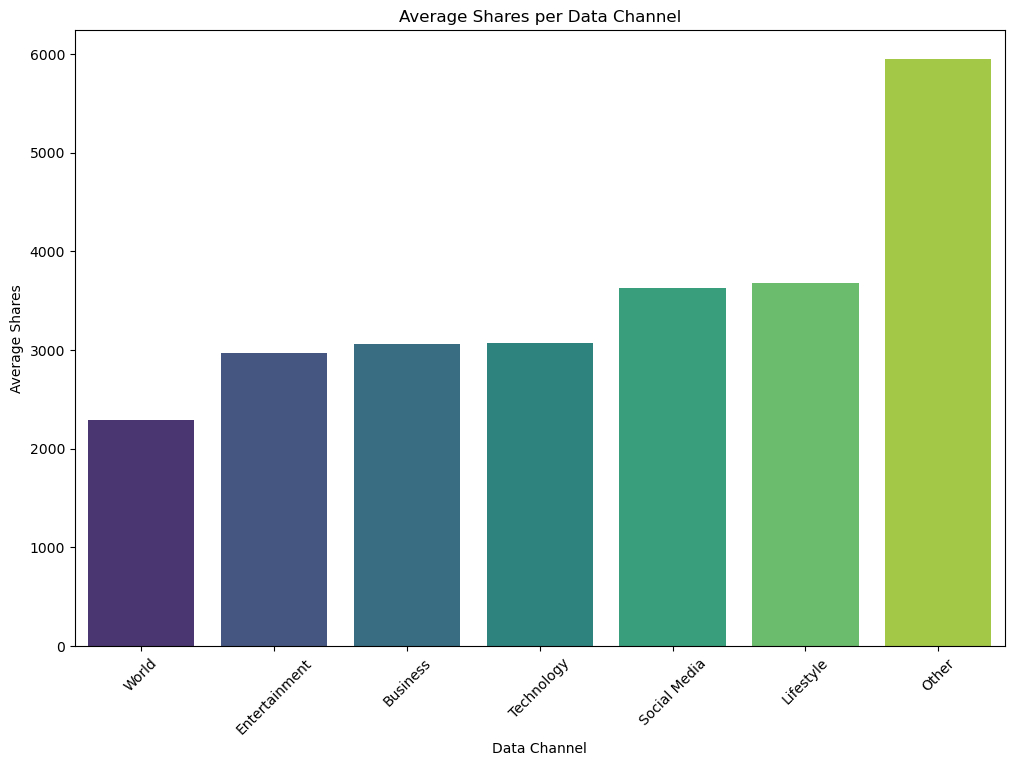

In [53]:
# Plotting a barplot to show the average number of shares for each data channel
plt.figure(figsize=(12, 8))

# Calculate the mean shares for each channel and plot
mean_shares_per_channel = filtered_data.groupby('Category')['shares'].mean().sort_values()
sns.barplot(x=mean_shares_per_channel.index, y=mean_shares_per_channel.values, palette='viridis')

plt.title('Average Shares per Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1        group2     meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------
     Business Entertainment   -92.5315 0.9993    -684.87    499.807  False
     Business     Lifestyle   619.1049 0.3398  -241.3507  1479.5604  False
     Business         Other  2882.1711    0.0  2269.2447  3495.0974   True
     Business  Social Media   566.3646 0.4051  -262.4432  1395.1723  False
     Business    Technology     9.2647    1.0   -577.572   596.1015  False
     Business         World  -775.2845 0.0012 -1344.5435  -206.0254   True
Entertainment     Lifestyle   711.6364 0.1688  -136.4964  1559.7691  False
Entertainment         Other  2974.7026    0.0  2379.1993  3570.2058   True
Entertainment  Social Media   658.8961 0.2066  -157.1111  1474.9033  False
Entertainment    Technology   101.7962 0.9985  -466.8186   670.4111  False
Entertainment         Wor

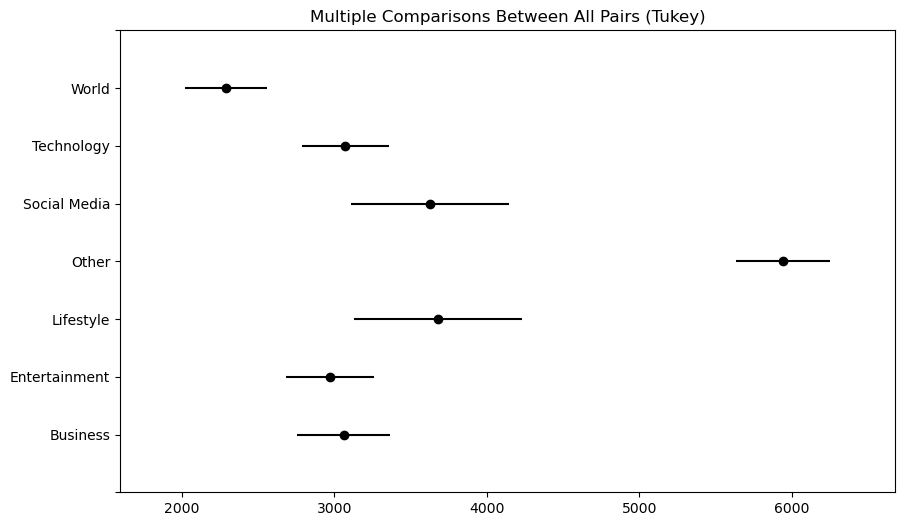

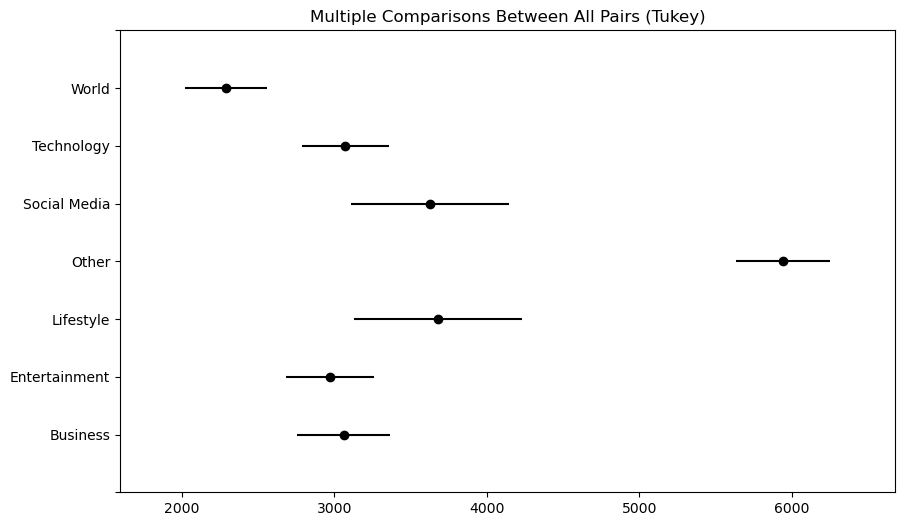

In [78]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and it contains a 'shares' column for the numeric data 
# and a 'data_channel' column for the categorical groupings.

# First, ensure your data meets ANOVA assumptions, and you've already conducted an ANOVA test.

# Perform Tukey's HSD test for all pairwise comparisons
tukey = pairwise_tukeyhsd(endog=filtered_data['shares'],     # Data
                          groups=filtered_data['Category'],   # Groups
                          alpha=0.05)             # Significance level

# Print the results
print(tukey)

# If you want to plot the results
tukey.plot_simultaneous()    
